# Boston Housing Exercise - Polynomial Regression

**Please import the Boston housing dataset, do some EDA, and clean data. Then calculate linear regression. After that please use Polynomial Regression. Calculate RMSE and R squared for each. Please use sklearn to implement Linear Regression**

In [54]:
from sklearn.datasets import load_boston
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import PolynomialFeatures


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the data set 

In [10]:
boston = load_boston()
data = boston["data"]
columns = boston["feature_names"]
target = boston["target"]
description = boston["DESCR"]
X = pd.DataFrame(data, columns=columns)
y = pd.Series(target, name="MEDV")

In [12]:
print(description)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Getting a quick overview

In [13]:
X2 = X.join(y)
X2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


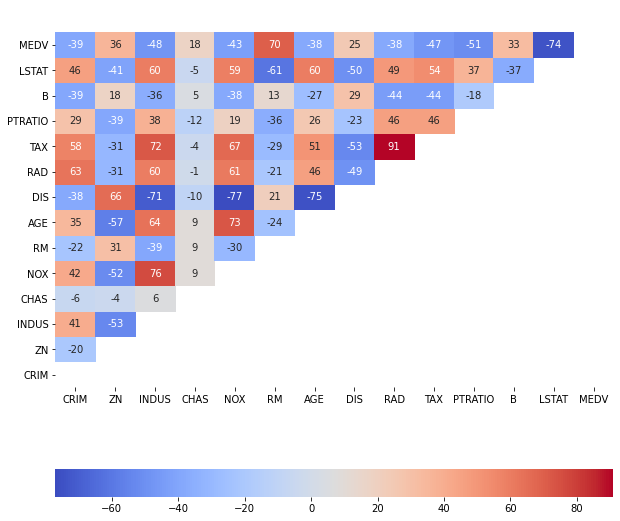

In [14]:
X_dum=pd.get_dummies(X2.copy())
X_dum
mask = np.triu(X_dum.corr())
fig, ax = plt.subplots(figsize=(10,10)) 
ax = sns.heatmap(round(X_dum.corr()*100,0)
                 ,annot=True
                 ,mask=mask
                 ,cmap='coolwarm'
                 ,cbar_kws= {'orientation': 'horizontal'}
                )
ax.set_ylim((0,15))
plt.savefig('correlogram.png')

Focus features = lstat (lower status), rm (rooms/dwelling), PTRATIO (pupil/teacher), INDUS

### Plotting values in focus 

#### Lower status of the population (%) 

<AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>

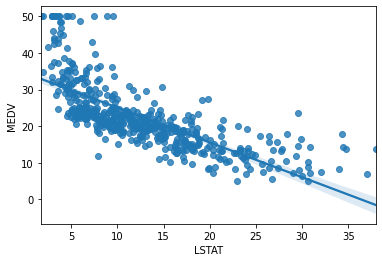

In [16]:
sns.regplot(x=X2["LSTAT"], y=X2["MEDV"])

#### Rooms per  dwelling

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

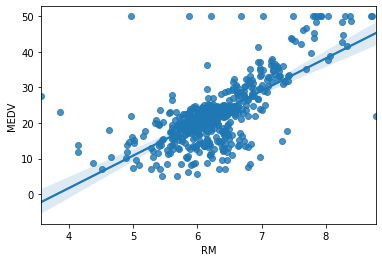

In [53]:
sns.regplot(x=X2["RM"], y=X2["MEDV"])

#### Pupil / teacher ratio 

<AxesSubplot:xlabel='PTRATIO', ylabel='MEDV'>

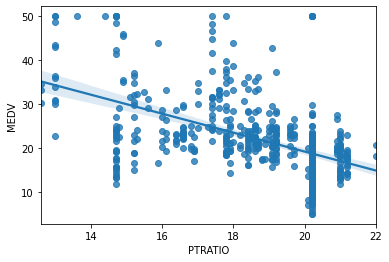

In [18]:
# Focus features = lstat (lower status), rm (rooms/dwelling), PTRATIO (pupil/teacher), INDUS

sns.regplot(x=X2["PTRATIO"], y=X2["MEDV"])

#### Industrial zones per town 

<AxesSubplot:xlabel='INDUS', ylabel='MEDV'>

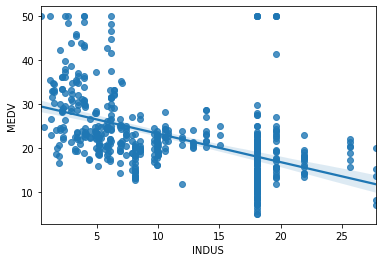

In [52]:
sns.regplot(x=X2["INDUS"], y=X2["MEDV"])

## Regression Modelling 

### Splitting the data 

In [60]:
# Splitting the dataset into the Training set and Test set
X = X2.iloc[:, 12:13].values
y = X2.iloc[:, 13].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


### Linear Regression 

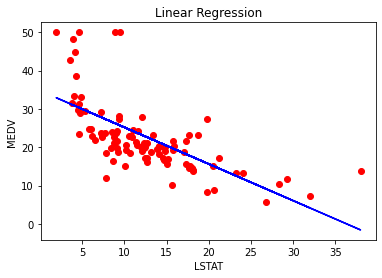

R2: 0.43095672846187616
MSE: 46.33630536002592


In [61]:
# Fitting Linear Regression to the dataset

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Visualizing the Linear Regression results
def viz_linear():
    plt.scatter(X_test, y_test, color='red')
    plt.plot(X_test, lin_reg.predict(X_test), color='blue')
    plt.title('Linear Regression')
    plt.xlabel('LSTAT')
    plt.ylabel("MEDV")
    plt.show()
    return
viz_linear()

y_pred = lin_reg.predict(X_test)

print("R2: "+ str(r2_score(y_test, y_pred)))
print("MSE: "+ str(mean_squared_error(y_test, y_pred)))


### Polynomial Regression 

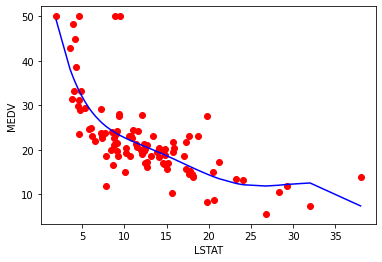

R2: 0.5792486052504809
MSE: 34.261129307570336


In [62]:
# Fitting Polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree=7)
X_poly = poly_reg.fit_transform(X_train)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

# Visualizing the Polymonial Regression results
def viz_polymonial():
    orders = np.argsort(X_test.ravel())
    plt.scatter(X_test, y_test, color='red')
    plt.plot(X_test[orders], pol_reg.predict(poly_reg.fit_transform(X_test[orders])), color='blue')
    plt.xlabel('LSTAT')
    plt.ylabel('MEDV')
    plt.show()
    return
viz_polymonial()

y_pred = pol_reg.predict(poly_reg.fit_transform(X_test))

print("R2: "+ str(r2_score(y_test, y_pred)))
print("MSE: "+ str(mean_squared_error(y_test, y_pred)))

### Multivar Linear Regression 

In [67]:
# Splitting the dataset into the Training set and Test set
X = X2[["RM", "LSTAT"]].values
y = X2.iloc[:, 13].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [69]:
# Fitting Linear Regression to the dataset

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

print("R2: "+ str(r2_score(y_test, y_pred)))
print("MSE: "+ str(mean_squared_error(y_test, y_pred)))

R2: 0.5409084827186417
MSE: 37.38310563877996


### Multivar Polynomial Regression 

In [70]:
# Fitting Polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree=7)
X_poly = poly_reg.fit_transform(X_train)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

y_pred = pol_reg.predict(poly_reg.fit_transform(X_test))

print("R2: "+ str(r2_score(y_test, y_pred)))
print("MSE: "+ str(mean_squared_error(y_test, y_pred)))

R2: -1.098258466417123
MSE: 170.85791166876092


<font color=red> R2 = negativ???</font>